In [6]:
# Your code here - remember to use markdown cells for comments as well!
EMILLY MURUGI NJUE
FULL-TIME

SyntaxError: invalid syntax (<ipython-input-6-177614b87237>, line 2)

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd #for data manipulation
import numpy as np #for numeric computation
import matplotlib.pyplot as plt #for ploting our data and creating visualization
%matplotlib inline
import sqlite3

# Connect to the SQL database
conn=sqlite3.connect('im.db')
cur=conn.cursor()

In [34]:
# Retrieve the data from the SQL tables using a join query
query = '''
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
ORDER BY numvotes DESC;'''
data = pd.read_sql_query(query, conn)
data


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...
73851,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5
73852,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5
73853,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73854,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [4]:
#total values in the db
total_values=np.product(data.shape)
total_values

590848

In [5]:
#to return the number of missing values detected in each column
missing_values_in_movie_basics=data.isna().sum()
print(missing_values_in_movie_basics)

print("Total missing values are", missing_values_in_movie_basics.sum())

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64
Total missing values are 8424


In [6]:
#total values missing in percentage form
#i can drop the missing values since it is only 1%
total=missing_values_in_movie_basics.sum()
percent=(total/total_values)*100
percent

1.4257474003466204

In [7]:
#to drop rows with missing values
dropped=data.dropna(inplace=True)
data.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
6,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
8,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
9,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


In [8]:
#drop columns not using
data.drop(['movie_id', 'primary_title','original_title','start_year','runtime_minutes'], inplace=True, axis=1)


In [9]:
data

,genres,averagerating,numvotes
0,"Action,Adventure,Sci-Fi",8.8,1841066
1,"Action,Thriller",8.4,1387769
2,"Adventure,Drama,Sci-Fi",8.6,1299334
3,"Drama,Western",8.4,1211405
4,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...
73848,"Documentary,Drama",7.6,5
73850,Documentary,7.0,5
73851,Comedy,5.8,5
73852,"Comedy,Horror",9.2,5


In [10]:
data['genres'].value_counts().head(15)

Drama                    10189
Documentary               9149
Comedy                    4604
Comedy,Drama              2451
Horror                    2232
Drama,Romance             1392
Thriller                  1288
Comedy,Drama,Romance      1159
Comedy,Romance            1128
Horror,Thriller            943
Drama,Thriller             938
Action                     721
Biography,Documentary      675
Documentary,Drama          572
Documentary,Music          544
Name: genres, dtype: int64

In [11]:
#check for duplicates
duplicates=data[data.duplicated(subset='genres')]
print(len(duplicates))
duplicates

64814


,genres,averagerating,numvotes
4,"Action,Adventure,Sci-Fi",8.1,1183655
8,"Action,Adventure,Comedy",8.0,820847
9,"Action,Adventure,Sci-Fi",7.2,795227
11,"Action,Adventure,Sci-Fi",8.1,780910
15,"Action,Adventure,Sci-Fi",7.2,692794
...,...,...,...
73848,"Documentary,Drama",7.6,5
73850,Documentary,7.0,5
73851,Comedy,5.8,5
73852,"Comedy,Horror",9.2,5


In [12]:
#drop all duplicated rows and keep the first ones
data.drop_duplicates(subset='genres', keep='first', inplace=True)
data

,genres,averagerating,numvotes
0,"Action,Adventure,Sci-Fi",8.8,1841066
1,"Action,Thriller",8.4,1387769
2,"Adventure,Drama,Sci-Fi",8.6,1299334
3,"Drama,Western",8.4,1211405
5,"Biography,Crime,Drama",8.2,1035358
...,...,...,...
70669,"Adventure,Fantasy,War",6.7,6
71576,"Action,Crime,Musical",4.4,5
71954,"Crime,Western",6.4,5
72612,"Comedy,Documentary,Fantasy",9.4,5


In [13]:
len(data)

906

In [14]:
#check the value count of the genre column to see if there are any duplivated genres
data['genres'].value_counts()

Biography,Documentary,Musical    1
Adventure,Comedy,Thriller        1
Biography,Crime,Drama            1
Action,Comedy,Family             1
Action,Drama,Thriller            1
                                ..
Family,Music                     1
Fantasy,History,Romance          1
Action,Crime,Sci-Fi              1
Romance,Sport                    1
Fantasy,History,Mystery          1
Name: genres, Length: 906, dtype: int64

In [40]:
data_sorted=data.sort_values(by='numvotes', ascending=False).head(20)
data_sorted

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
6,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
8,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
9,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


<AxesSubplot:xlabel='numvotes', ylabel='genres'>

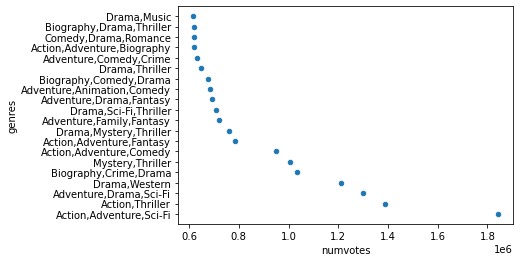

In [16]:
#plot a scatter plot to check for outliers
data_sorted.plot(kind='scatter', x='numvotes', y='genres')

In [19]:
#checking for outliers in the dataframe
# calculate the IQR of a column
Q1 = data['numvotes'].quantile(0.25)
Q3 = data['numvotes'].quantile(0.75)
IQR = Q3 - Q1

# identify any values outside the range of 1.5 times the IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#we use a boolean expression to filter the DataFrame and return a new DataFrame outliers containing the rows with values outside the range.
outliers = data[(data['numvotes'] < lower_limit) | (data['numvotes'] > upper_limit)]
outliers

,genres,averagerating,numvotes
0,"Action,Adventure,Sci-Fi",8.8,1841066
1,"Action,Thriller",8.4,1387769
2,"Adventure,Drama,Sci-Fi",8.6,1299334
3,"Drama,Western",8.4,1211405
5,"Biography,Crime,Drama",8.2,1035358
...,...,...,...
835,"Drama,Thriller,War",7.3,72301
847,"Drama,Music,Musical",6.4,71021
851,"Action,Comedy,Drama",6.8,70604
854,"Drama,Mystery,Romance",7.1,70308


Text(0.5, 1.0, 'MOST LIKED MOVIE GENRES')

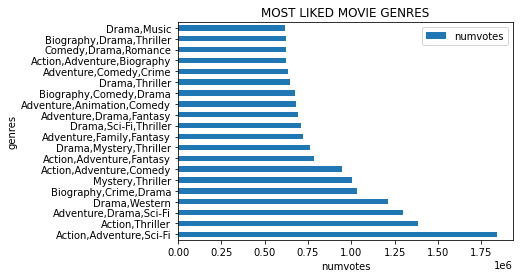

In [20]:
#data = data.sort_values(by='numvotes', ascending=False).head(10)
data_sorted.plot(kind='barh', x='genres', y='numvotes')
plt.xlabel('numvotes')
plt.ylabel('genres')
plt.title('MOST LIKED MOVIE GENRES')


In [39]:
# Read the CSV file into a pandas DataFrame
df_bom=pd.read_csv('bom.movie_gross.csv').head(20)
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [22]:
df_bom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           20 non-null     object 
 1   studio          20 non-null     object 
 2   domestic_gross  20 non-null     float64
 3   foreign_gross   20 non-null     object 
 4   year            20 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 928.0+ bytes


In [23]:
#check the missing values
print(df_bom.isna().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [24]:
#drop all the rows with missing values 
df_bom.dropna(inplace=True)
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [25]:
df_bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [26]:
#check after dropping the missing values
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           20 non-null     object 
 1   studio          20 non-null     object 
 2   domestic_gross  20 non-null     float64
 3   foreign_gross   20 non-null     object 
 4   year            20 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 960.0+ bytes


In [27]:
#check if this file has duplicates
#it doesn't have duplicates
dups=df_bom[df_bom['studio'].duplicated()]
print(len(dups))
dups

10


,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
3,Inception,WB,292600000.0,535700000,2010
7,Tangled,BV,200800000.0,391000000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010
10,Clash of the Titans (2010),WB,163200000.0,330000000,2010
13,Tron Legacy,BV,172100000.0,228000000,2010
15,Prince of Persia: The Sands of Time,BV,90800000.0,245600000,2010
17,Megamind,P/DW,148400000.0,173500000,2010
18,Robin Hood,Uni.,105300000.0,216400000,2010
19,The Last Airbender,Par.,131800000.0,187900000,2010


In [28]:
#drop duplicates
df_bom.drop_duplicates(subset='studio', keep='first', inplace=True)
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
11,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000,2010
12,The King's Speech,Wein.,135500000.0,275400000,2010
14,The Karate Kid,Sony,176600000.0,182500000,2010
16,Black Swan,FoxS,107000000.0,222400000,2010


In [29]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010


In [30]:
#drop columns not using
df_bom.drop(['title', 'year'], inplace=True, axis=1)
df_bom.head(10)


,studio,domestic_gross,foreign_gross
0,BV,415000000.0,652000000
2,WB,296000000.0,664300000
4,P/DW,238700000.0,513900000
5,Sum.,300500000.0,398000000
6,Par.,312400000.0,311500000
8,Uni.,251500000.0,291600000
11,Fox,104400000.0,311300000
12,Wein.,135500000.0,275400000
14,Sony,176600000.0,182500000
16,FoxS,107000000.0,222400000


In [54]:
# example column with object dtype
#the errors='coerce' argument will replace any non-numeric values with NaN.
df_bom["foreign_gross"] = pd.to_numeric(df_bom["foreign_gross"], errors='coerce')

#check if there are null values
df_bom['foreign_gross'].isna().sum()

# fill NaN values with 0 and convert the column to integers
df_bom["foreign_gross"] = df_bom["foreign_gross"].fillna(0).astype(int)

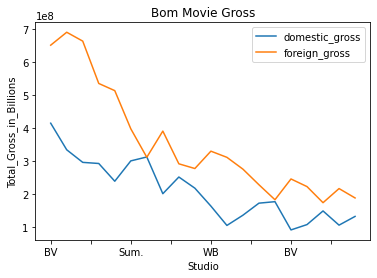

In [58]:
df_bom.plot(x='studio', y=['domestic_gross','foreign_gross'] )
plt.xlabel('Studio')
plt.ylabel('Total_Gross_in_Billions')
plt.title('Bom Movie Gross')
plt.show()

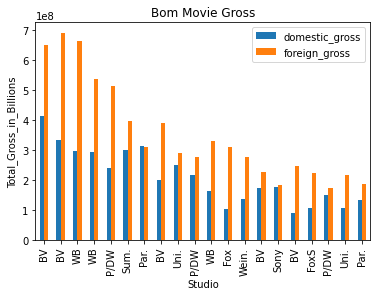

In [57]:
df_bom.plot(kind="bar", x='studio', y=['domestic_gross','foreign_gross'] )
plt.xlabel('Studio')
plt.ylabel('Total_Gross_in_Billions')
plt.title('Bom Movie Gross')
plt.show()

In [32]:
df_bom["total_gross"] = df_bom["domestic_gross"] + df_bom["foreign_gross"]
df_bom_sorted=df_bom.sort_values(by='total_gross', ascending=False)
df_bom_sorted

,studio,domestic_gross,foreign_gross,total_gross
0,BV,415000000.0,652000000,1.067000e+09
2,WB,296000000.0,664300000,9.603000e+08
4,P/DW,238700000.0,513900000,7.526000e+08
5,Sum.,300500000.0,398000000,6.985000e+08
6,Par.,312400000.0,311500000,6.239000e+08
8,Uni.,251500000.0,291600000,5.431000e+08
11,Fox,104400000.0,311300000,4.157000e+08
12,Wein.,135500000.0,275400000,4.109000e+08
14,Sony,176600000.0,182500000,3.591000e+08
16,FoxS,107000000.0,222400000,3.294000e+08


In [ ]:
"""
The total amount earned by the box office in the bom.movie_gross is 246,480,115,968 (246 Billion).
"""


""" Domestic Gross is the standard measure of the value added created through the production of
    goods and services within the geographical boundaries of a country during a certain period. 
    As such, it also measures the income earned from that production, or the total amount spent on final goods and services

Foreign Gross involves those economic transactions that take place outside the geographical boundaries of a country
"""

In [33]:
#checking for outliers in the dataframe
# calculate the IQR of a column
Q1 = df_bom_sorted['foreign_gross'].quantile(0.25)
Q3 = df_bom_sorted['foreign_gross'].quantile(0.75)
IQR = Q3 - Q1

# identify any values outside the range of 1.5 times the IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#we use a boolean expression to filter the DataFrame and return a new DataFrame outliers containing the rows with values outside the range.
outliers = df_bom_sorted[(df_bom_sorted['foreign_gross'] < lower_limit) | (df_bom_sorted['foreign_gross'] > upper_limit)]
outliers

,studio,domestic_gross,foreign_gross,total_gross


<AxesSubplot:xlabel='studio', ylabel='total_gross'>

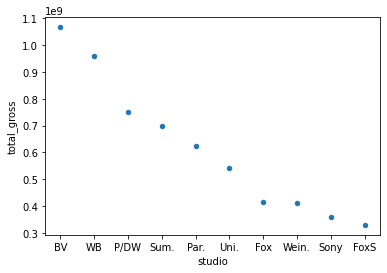

In [34]:
df_bom_sorted.plot(kind='scatter', x='studio', y='total_gross')


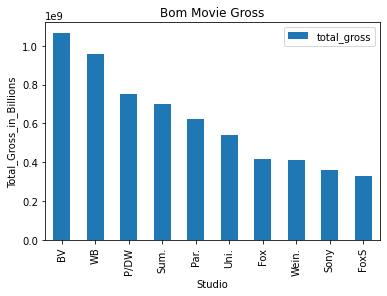

In [35]:
#now we plot a graph
df_bom_sorted.plot(kind='bar', x='studio', y='total_gross')
plt.xlabel('Studio')
plt.ylabel('Total_Gross_in_Billions')
plt.title('Bom Movie Gross')
plt.show()